In [ ]:
"""
O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv).
Crie um modelo para prever nota da prova de matemática (NU_NOTA_MT) de quem participou do ENEM 2016.
Esse arquivo, como parte do teste, serviu para dividirmos a base (train.csv ) em um conjunto de treino(70%
dos dados) e um conjunto de teste(30%).
"""

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split #split arrays or matrices into random train and test subsets
from sklearn import metrics #accuracy classification score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Loading out training csv file; it contains our target(NU_NOTA_MT) and many features 
df_train = pd.read_csv('/home/larag/Documents/Machine Learning/Regressão/testfiles/train.csv')
print(df_train.shape) #rows, columns
df_train.head() 

(13730, 167)


,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [3]:
df_train.NU_NOTA_MT

0        399.4
1        459.8
2          NaN
3          NaN
4          NaN
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64

In [4]:
df_train.isnull().any() #checking which are the columns that contains NaN values in it
df_train = df_train.fillna(method='ffill') #removing all the null values

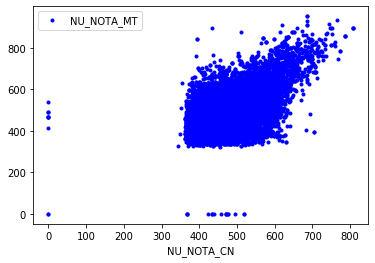

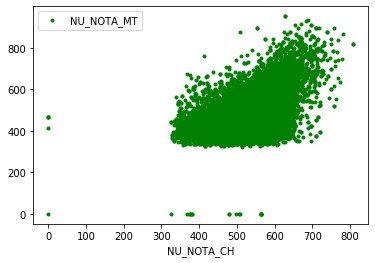

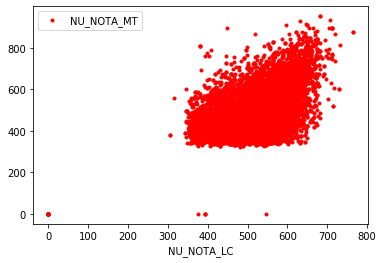

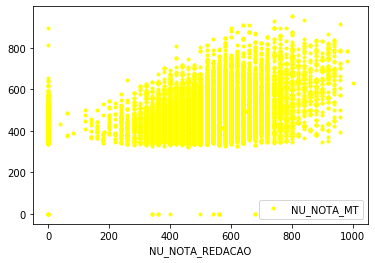

In [5]:
df_train.plot(x='NU_NOTA_CN', y='NU_NOTA_MT', style='.', color='blue')
df_train.plot(x='NU_NOTA_CH', y='NU_NOTA_MT', style='.', color='green')
df_train.plot(x='NU_NOTA_LC', y='NU_NOTA_MT', style='.', color='red')
df_train.plot(x='NU_NOTA_REDACAO', y='NU_NOTA_MT', style='.', color='yellow')
plt.show()

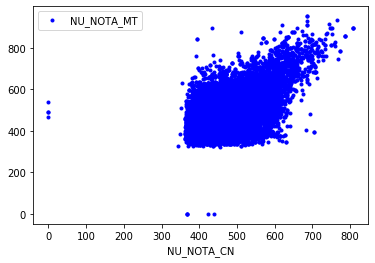

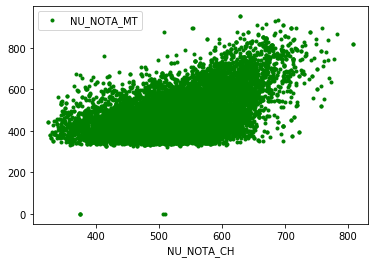

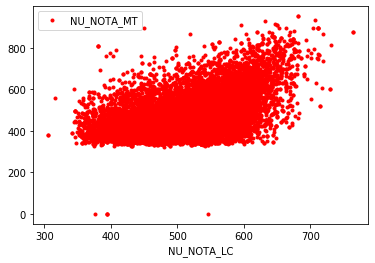

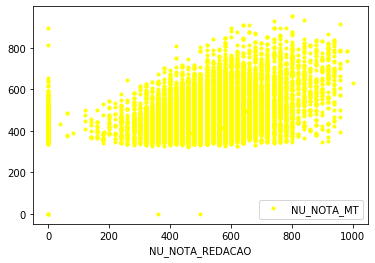

In [6]:
#grades=0 grades won't be part of our training set (might be outliers)
df_train = df_train.loc[((df_train['NU_NOTA_CN'] != 0) | (df_train['NU_NOTA_CH'] != 0)) & 
                        ((df_train['NU_NOTA_LC'] != 0) | (df_train['NU_NOTA_MT'] != 0))]

df_train.plot(x='NU_NOTA_CN', y='NU_NOTA_MT', style='.', color='blue')
df_train.plot(x='NU_NOTA_CH', y='NU_NOTA_MT', style='.', color='green')
df_train.plot(x='NU_NOTA_LC', y='NU_NOTA_MT', style='.', color='red')
df_train.plot(x='NU_NOTA_REDACAO', y='NU_NOTA_MT', style='.', color='yellow')
plt.show()

In [7]:
#We have to choose the features using only the training data. If we use our test data, we can end up 
#overfitting the model.
possible_features = ['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_ESCOLA', 'IN_TREINEIRO', 
                     'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

#we split 70% of the data to the training set and 30% to test
#random_state is the seed used by the random number generator
x_train, x_test, y_train, y_test = train_test_split(df_train[possible_features], df_train['NU_NOTA_MT'], 
                                                    test_size=0.3, random_state=0)

In [8]:
print(x_train.tail())
print(y_train.tail())

#Converting y_test (series format) to DataFrame (in order to concat x_train and y_train into temp_train to 
#calculate the correlation matrox)
temp_y_train = y_train
temp_y_train = temp_y_train.to_frame()
print(temp_y_train.columns)

#Concating frames
frames = [x_train, temp_y_train]
#Combine DataFrame objects horizontally along the x axis by passing in axis=1.
temp_train = pd.concat(frames, axis=1) 

temp_train = temp_train.fillna(method='ffill') #removing all the null values

print(temp_train.columns)
print(temp_train.tail()) #shows 5 last instances

      SG_UF_RESIDENCIA  NU_IDADE  TP_ESCOLA  IN_TREINEIRO  NU_NOTA_CN  \
13139               MG        19          1             0       424.0   
3273                RJ        17          1             1       458.0   
9859                PE        18          1             0       527.5   
10813               PR        20          2             0       457.5   
2740                CE        17          1             1       503.7   

       NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO  
13139       563.9       533.9            740.0  
3273        548.2       559.6            600.0  
9859        696.7       648.3            840.0  
10813       500.9       438.3            560.0  
2740        571.8       484.5            360.0  
13139    632.0
3273     366.2
9859     422.5
10813    391.6
2740     466.5
Name: NU_NOTA_MT, dtype: float64
Index(['NU_NOTA_MT'], dtype='object')
Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_ESCOLA', 'IN_TREINEIRO',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_

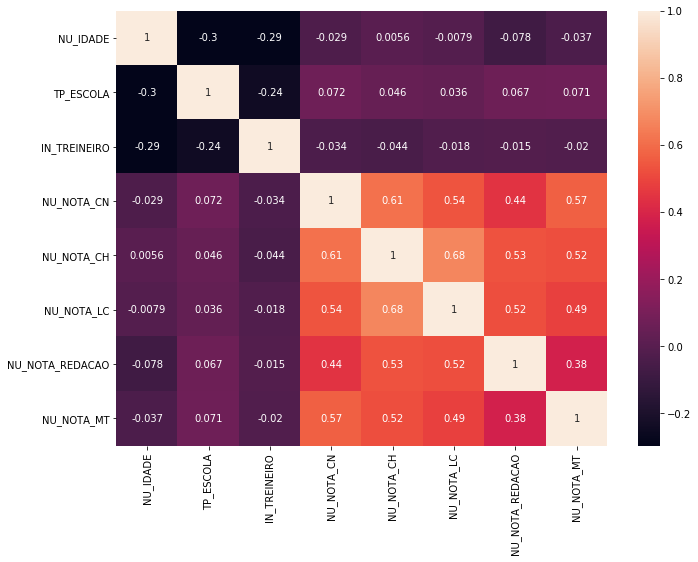

In [9]:
correlation_between_possible_features = ['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_ESCOLA', 'IN_TREINEIRO', 
                     'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']
#shows which features are more related to the target (NU_NOTA_MT)
correlation_matrix = temp_train.corr() #calculates the correlation matrix
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True) #annot: if True, write the data value in each cell.
plt.show()

In [10]:
#Analyzing the heatmap above, we can conclude that the features which are most related to NU_NOTA_MT are
#NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC and NU_NOTA_REDACAO
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

#Creating and training the model
x_train = df_train[features]
y_train = df_train['NU_NOTA_MT']
x_test = x_test[features]
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
#Testing model
y_pred_test = model.predict(x_test) 

In [12]:
df_train = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df = df_train.head(25)
df

,Actual,Predicted
8913,479.2,475.772
11326,375.7,385.529
2887,487.1,479.448
6521,390.3,400.952
582,555.4,556.386
3157,473.8,465.515
7754,456.8,452.319
1458,404.7,423.126
8834,395.7,423.573
5417,529.2,521.292


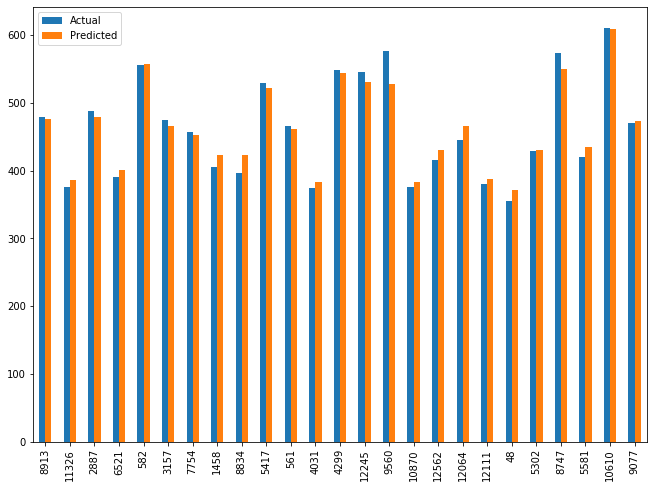

In [13]:
df.plot(kind='bar', figsize=(11, 8))
plt.show()

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 16.014395721925148
Mean Squared Error: 538.6941897929026
Root Mean Squared Error: 23.20978650899018
